Goal: Optimize portfolio allocation to maximize returns while minimizing risk.
Output: A portfolio allocation strategy that can dynamically adjust based on market conditions.

In [ ]:
import yfinance as yf
import pandas as pd

#Creating a random portfolio of equities, crypto and commodities.
tickers = ['AAPL', 'MSFT','META', 'INTC','DIS', 'AMZN','KO','TSLA', 'BTC-USD' ,'GLD']
tickers.sort()
start = "2015-01-01"
end = "2024-07-08"

stocks = pd.DataFrame()
for stock_name in tickers:
    # daily data
    stocks[stock_name] = yf.download(stock_name,start,end)['Adj Close']

stocks = round(stocks,2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks

,AAPL,AMZN,BTC-USD,DIS,GLD,INTC,KO,META,MSFT,TSLA
Date,,,,,,,,,,
2015-01-02 00:00:00+00:00,24.35,15.43,315.03,86.69,114.08,27.90,30.89,78.21,40.23,14.62
2015-01-05 00:00:00+00:00,23.66,15.11,274.47,85.43,115.80,27.58,30.89,76.96,39.86,14.01
2015-01-06 00:00:00+00:00,23.66,14.76,286.19,84.97,117.12,27.07,31.13,75.92,39.28,14.09
2015-01-07 00:00:00+00:00,24.00,14.92,294.34,85.84,116.43,27.64,31.52,75.92,39.78,14.06
2015-01-08 00:00:00+00:00,24.92,15.02,283.35,86.73,115.94,28.15,31.90,77.95,40.95,14.04
...,...,...,...,...,...,...,...,...,...,...
2024-06-28 00:00:00+00:00,210.15,193.25,60320.14,98.83,215.01,30.77,63.22,503.74,446.15,197.88
2024-07-01 00:00:00+00:00,216.26,197.20,62851.98,97.59,215.57,30.65,62.85,504.20,455.91,209.86
2024-07-02 00:00:00+00:00,219.77,200.00,62029.02,97.54,215.56,30.87,62.72,509.01,458.45,231.26


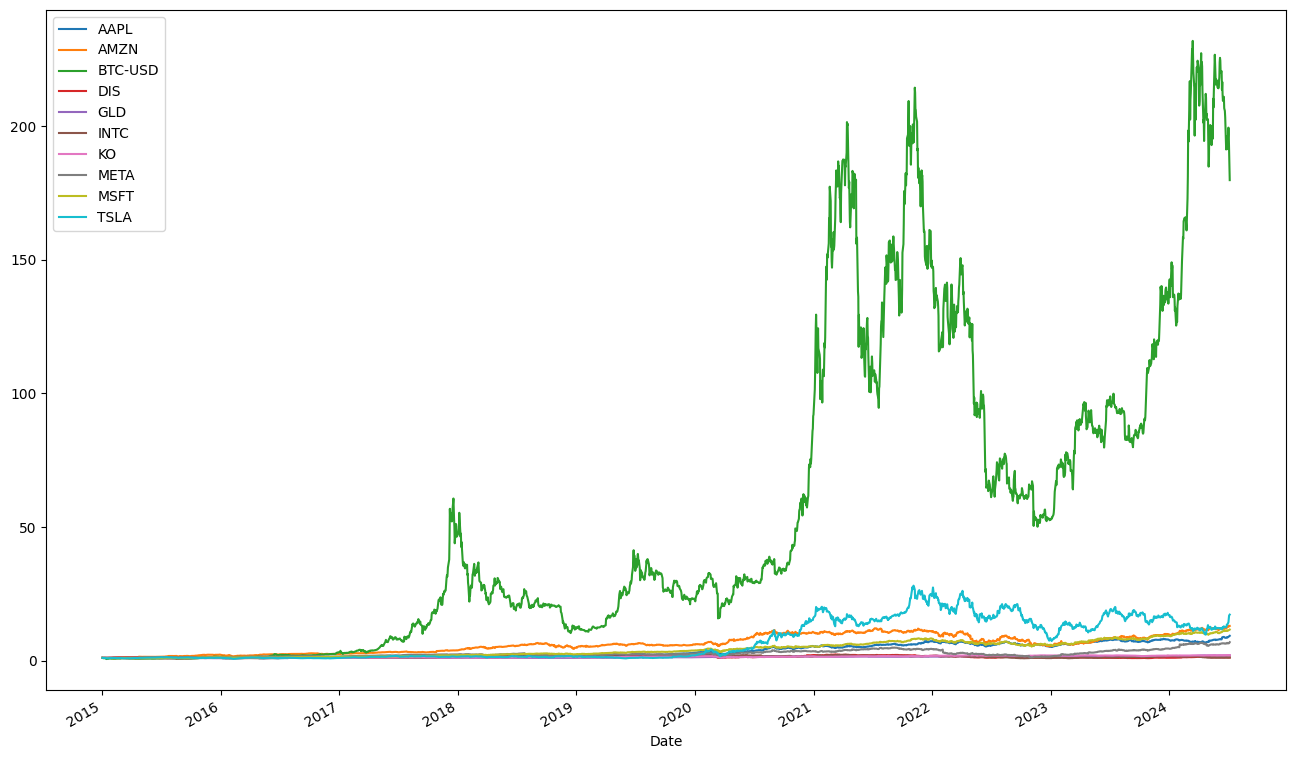

In [ ]:
#Lets Visualize the behaviour of each stock's price normalized
(stocks[tickers] / stocks[tickers].iloc[0]).plot(figsize=(16, 10));

Calculate Daily Returns

In [ ]:
# Calculate daily returns
daily_returns = stocks.pct_change().dropna()
daily_returns = round(daily_returns, 4)  # Round to 4 decimal places for better readability

# View the first few rows
daily_returns.head()


,AAPL,AMZN,BTC-USD,DIS,GLD,INTC,KO,META,MSFT,TSLA
Date,,,,,,,,,,
2015-01-05 00:00:00+00:00,-0.0283,-0.0207,-0.1287,-0.0145,0.0151,-0.0115,0.0000,-0.0160,-0.0092,-0.0417
2015-01-06 00:00:00+00:00,0.0000,-0.0232,0.0427,-0.0054,0.0114,-0.0185,0.0078,-0.0135,-0.0146,0.0057
2015-01-07 00:00:00+00:00,0.0144,0.0108,0.0285,0.0102,-0.0059,0.0211,0.0125,0.0000,0.0127,-0.0021
2015-01-08 00:00:00+00:00,0.0383,0.0067,-0.0373,0.0104,-0.0042,0.0185,0.0121,0.0267,0.0294,-0.0014
2015-01-09 00:00:00+00:00,0.0008,-0.0113,0.0249,0.0048,0.0114,0.0018,-0.0110,-0.0056,-0.0085,-0.0185


Explore and Visualize Returns

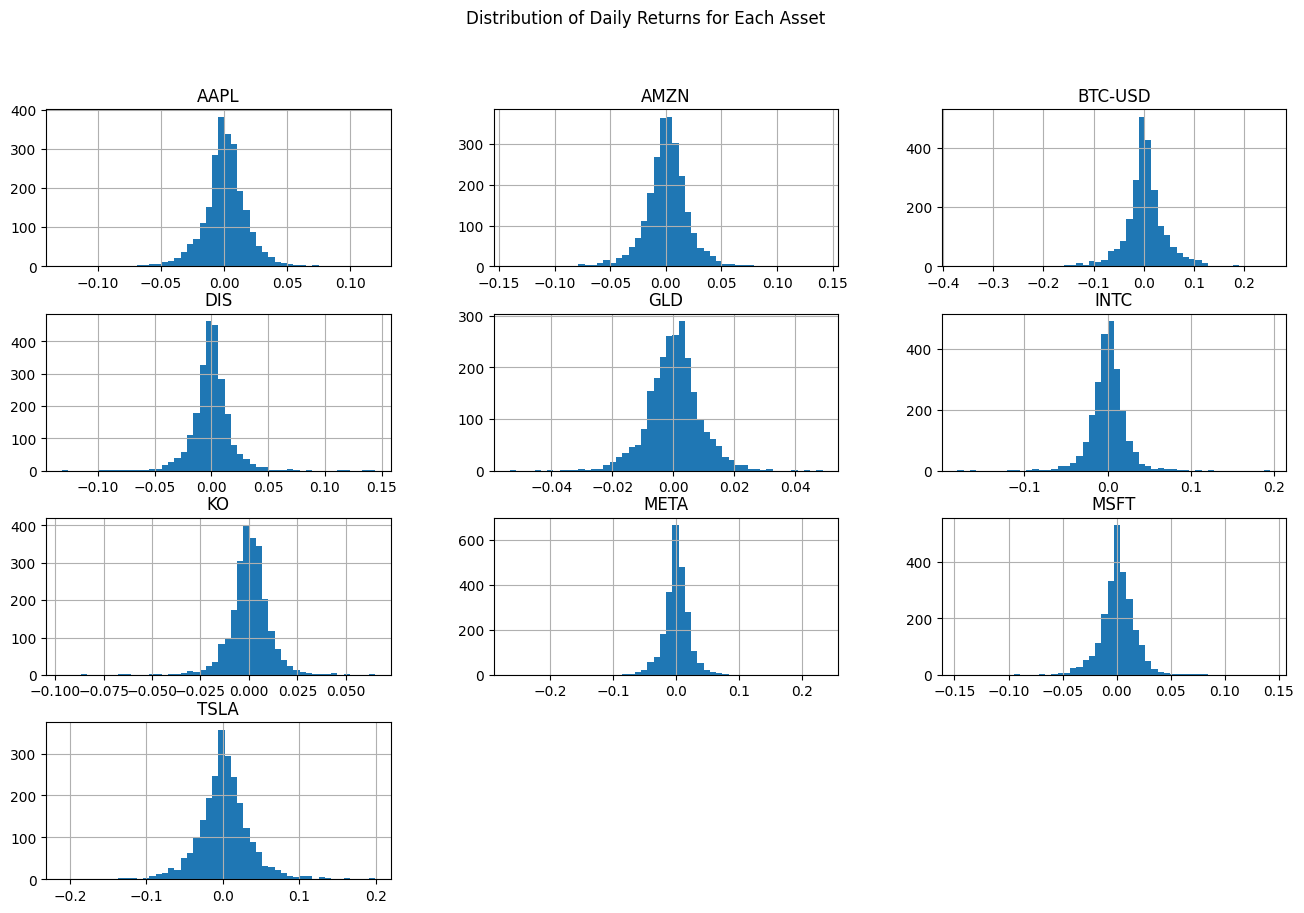

              AAPL         AMZN      BTC-USD          DIS          GLD  \
count  2391.000000  2391.000000  2391.000000  2391.000000  2391.000000   
mean      0.001096     0.001286     0.003138     0.000207     0.000315   
std       0.018162     0.020707     0.043781     0.017691     0.008850   
min      -0.128700    -0.140500    -0.371700    -0.131700    -0.053700   
25%      -0.007450    -0.008700    -0.014700    -0.007200    -0.004600   
50%       0.000800     0.001100     0.002000     0.000100     0.000500   
75%       0.010100     0.011300     0.021100     0.008100     0.005000   
max       0.119700     0.141000     0.252500     0.144100     0.049000   

              INTC           KO         META         MSFT         TSLA  
count  2391.000000  2391.000000  2391.000000  2391.000000  2391.000000  
mean      0.000282     0.000365     0.001096     0.001175     0.001819  
std       0.021240     0.011314     0.023847     0.017278     0.035510  
min      -0.180500    -0.096600    -0.263

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of returns for each asset
daily_returns.hist(bins=50, figsize=(16, 10))
plt.suptitle("Distribution of Daily Returns for Each Asset")
plt.show()

# Descriptive statistics
stats = daily_returns.describe()
print(stats)


Practical Use
Portfolio Diversification:

Combine low-volatility assets (KO, GLD) with high-volatility, high-return assets (BTC-USD, TSLA) for risk-adjusted returns.
Risk Management:

Use standard deviations and min/max values to identify riskier assets that may need hedging or position limits.
Modeling Assumptions:

Returns being close to normal distribution helps in financial modeling (e.g., Mean-Variance Optimization).


In [ ]:
# Calculate expected annualized returns
annualized_returns = daily_returns.mean() * 252  # 252 trading days in a year

# Calculate annualized covariance matrix
annualized_covariance = daily_returns.cov() * 252

# Display results
print("Annualized Expected Returns:\n", annualized_returns)
print("\nAnnualized Covariance Matrix:\n", annualized_covariance)


Annualized Expected Returns:
 AAPL       0.276125
AMZN       0.323985
BTC-USD    0.790844
DIS        0.052076
GLD        0.079342
INTC       0.070994
KO         0.091873
META       0.276072
MSFT       0.296024
TSLA       0.458374
dtype: float64

Annualized Covariance Matrix:
              AAPL      AMZN   BTC-USD       DIS       GLD      INTC        KO  \
AAPL     0.083127  0.052926  0.031320  0.034099  0.000807  0.050220  0.019481   
AMZN     0.052926  0.108055  0.034396  0.034191  0.001970  0.044696  0.013610   
BTC-USD  0.031320  0.034396  0.483034  0.032990  0.008701  0.033923  0.007949   
DIS      0.034099  0.034191  0.032990  0.078868  0.000126  0.037842  0.020642   
GLD      0.000807  0.001970  0.008701  0.000126  0.019738  0.002671  0.001724   
INTC     0.050220  0.044696  0.033923  0.037842  0.002671  0.113681  0.020684   
KO       0.019481  0.013610  0.007949  0.020642  0.001724  0.020684  0.032257   
META     0.057830  0.073766  0.033819  0.038675  0.001428  0.053065  0.0154

Step 4: Perform Mean-Variance Optimization
Why?
Mean-Variance Optimization helps to determine the portfolio weights that maximize returns for a given level of risk.



In [ ]:
pip install PyPortfolioOpt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from pypfopt import EfficientFrontier, risk_models, expected_returns

# Optimize the portfolio
ef = EfficientFrontier(annualized_returns, annualized_covariance)

# Maximize the Sharpe ratio
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Portfolio performance
performance = ef.portfolio_performance(verbose=True)

print("\nOptimized Portfolio Weights:\n", cleaned_weights)


Expected annual return: 33.3%
Annual volatility: 21.1%
Sharpe Ratio: 1.48

Optimized Portfolio Weights:
 OrderedDict([('AAPL', 0.08213), ('AMZN', 0.12967), ('BTC-USD', 0.1842), ('DIS', 0.0), ('GLD', 0.31352), ('INTC', 0.0), ('KO', 0.0), ('META', 0.0), ('MSFT', 0.21831), ('TSLA', 0.07217)])


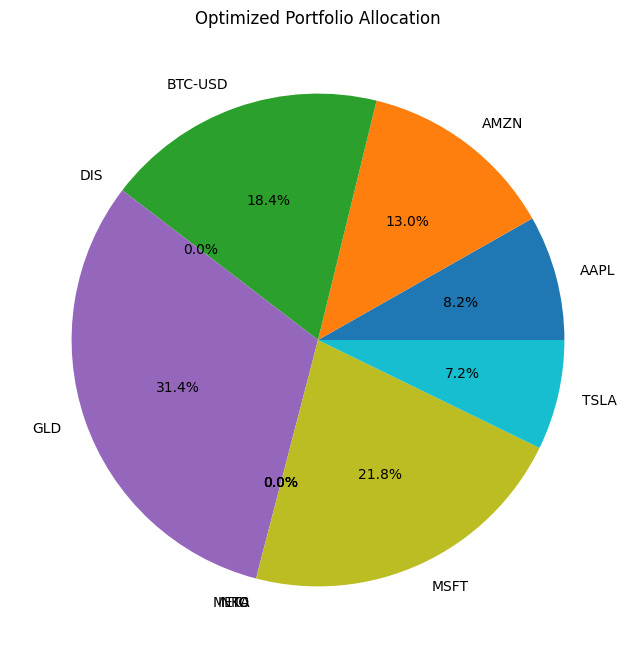

In [ ]:
# Visualize the weights as a pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(cleaned_weights.values(), labels=cleaned_weights.keys(), autopct='%1.1f%%')
plt.title("Optimized Portfolio Allocation")
plt.show()


Step 6: Backtest the Optimized Portfolio
Backtest to see how the optimized portfolio would have performed historically.



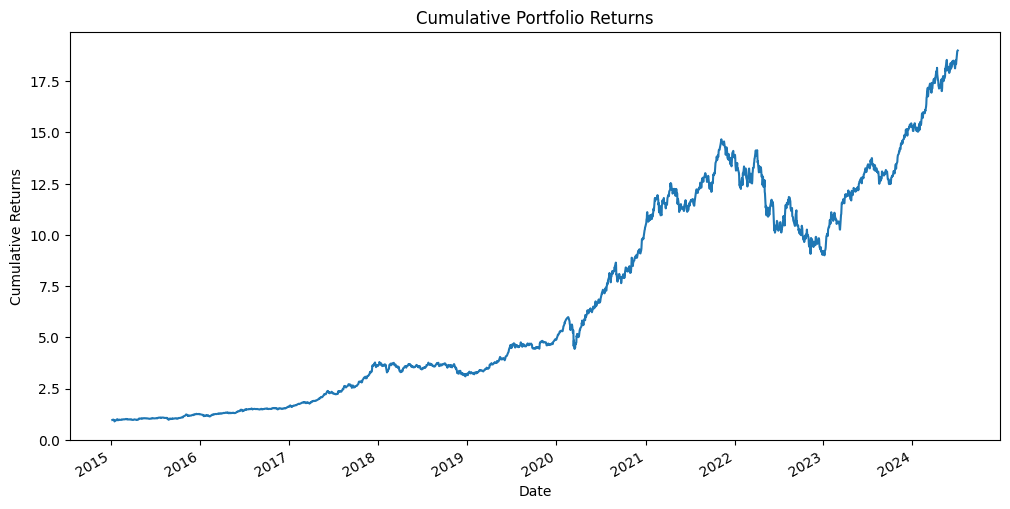

In [ ]:
# Calculate portfolio returns
optimized_weights = pd.Series(cleaned_weights)
portfolio_returns = (daily_returns * optimized_weights).sum(axis=1)

# Cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 6), title="Cumulative Portfolio Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()
